In [1]:
#conda install -c districtdatalabs yellowbrick

In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
#Loading the dataset
data = pd.read_csv(r"C:\Users\hp\Downloads\marketing_campaign.csv")

In [4]:
#assesing data
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### observations

* There are missing values in income
* Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime

In [7]:
#drop missing values
data.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [8]:
data.duplicated().sum()

0

In [9]:
#changing the date dtype to datetime object
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format='mixed')

In [10]:
type(data['Dt_Customer'][0])

pandas._libs.tslibs.timestamps.Timestamp

### feature engineering

- Creating new features; "Customer_For","Age" and " is Parent" and "total spent"
- modifying existing features; "education",
- renaming some features for more clarity
- dropped off more redundant features

In [11]:
#Created a feature "Customer_For"
#of the number of days the customers started to shop in the store relative to the last recorded date
days = []
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

d1 = max(dates) #taking it to be the newest customer
for x in dates:
    delta = d1 - x
    days.append(delta)

data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"])

In [12]:
#explore the material status and the education level features
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [13]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [14]:
#Feature Engineering
#Age of customer today
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the household
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children > 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Postgraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [15]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,40,422,Partner,1,3,1


### EXPLORATORY DATA ANALYIS
- multivariate exploration to explore features relationships


In [16]:
#check descriptive statisitc
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.064286,0.013393,0.009375,0.149107,4.424054e+16,52.194196,605.798214,0.950446,2.595089,0.715179
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.245316,0.114976,0.096391,0.356274,2.006466e+16,11.984069,602.249288,0.751803,0.906959,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.944080e+16,44.000000,68.750000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.000000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.920560e+16,62.000000,1045.500000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


In [17]:
data.describe(include=['object','bool'])

,Education,Living_With
count,2240,2240
unique,3,2
top,Graduate,Partner
freq,1127,1444


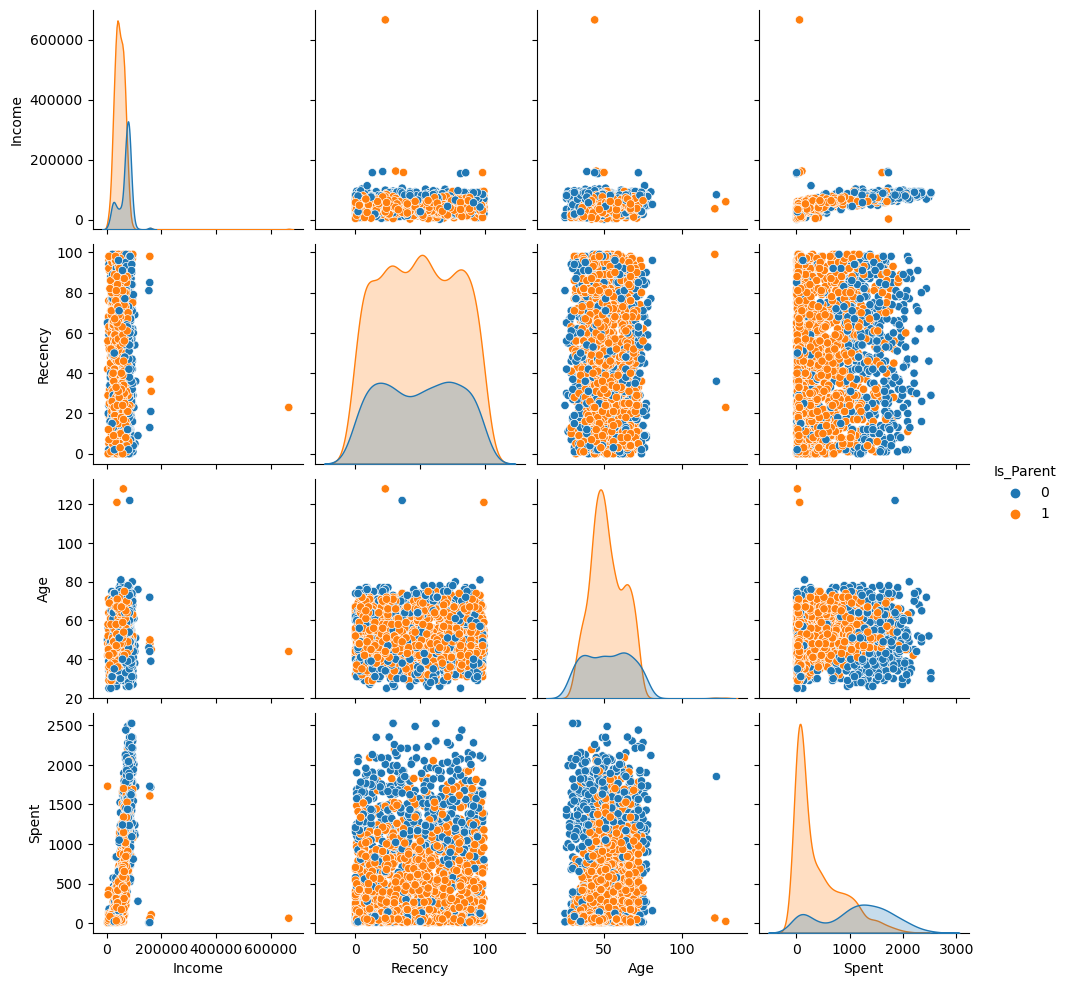

In [18]:
#To plot some selected features
#To plot some selected features
cat_var = [ "Income", "Recency", "Age", "Spent", "Is_Parent"]
sns.pairplot(data[cat_var], hue= "Is_Parent");

In [19]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print(f"The total number of data-points after removing the outliers are: {len(data)}")

The total number of data-points after removing the outliers are: 2212


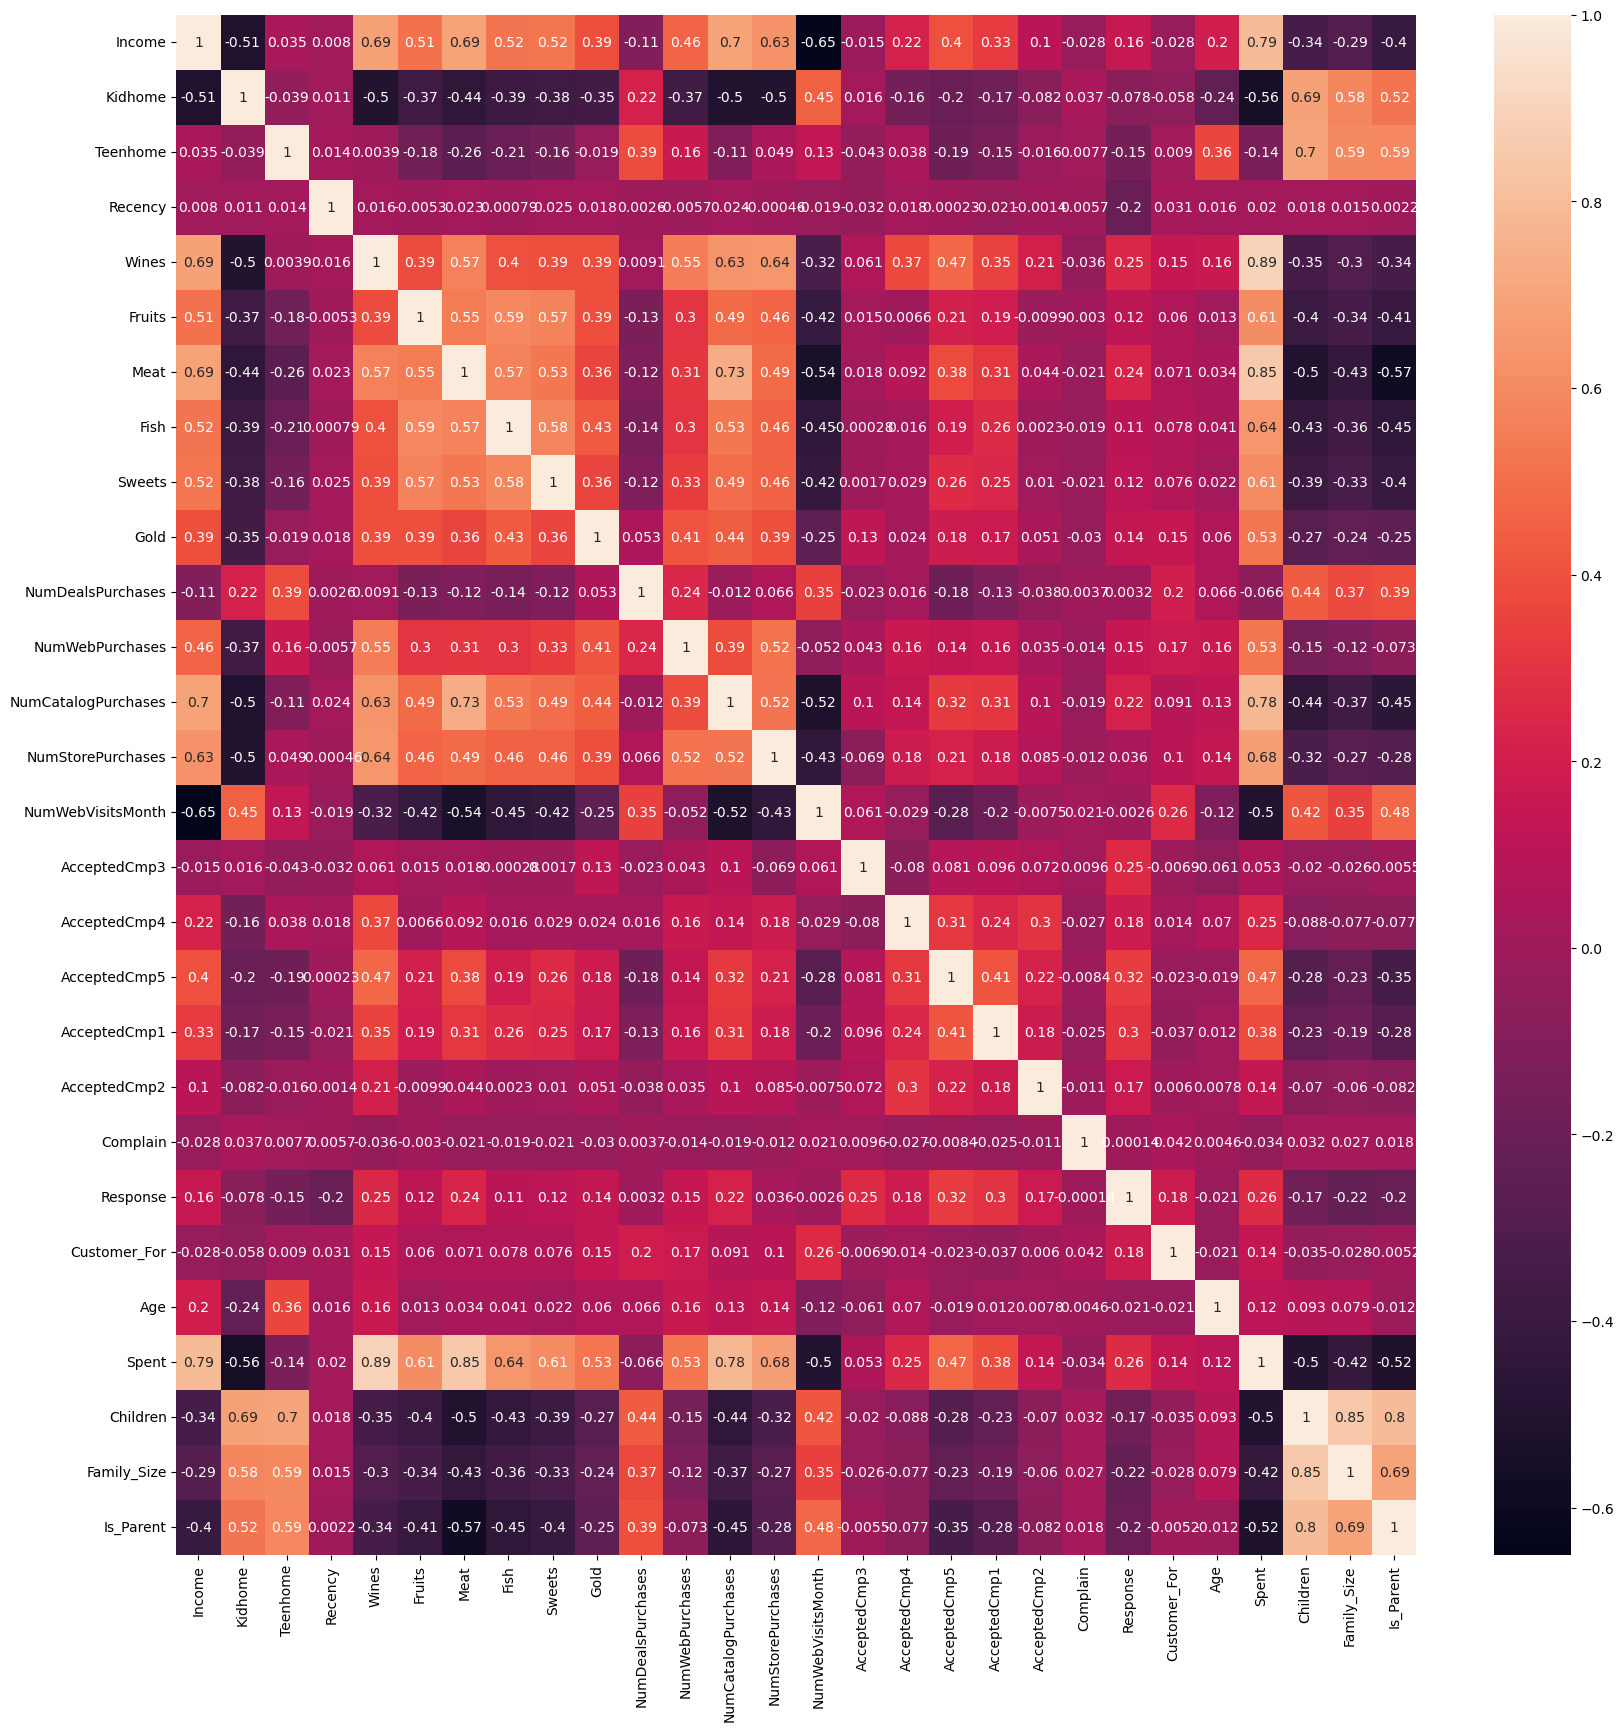

In [20]:
#correlation matrix
c = data.drop(["Education","Living_With"],axis=1)

plt.figure(figsize=(20,20))
sns.heatmap(c.corr(),annot=True);

- The spent feature has a positive correlation with the features: income, all product categories, all purchase place type, and campaign offers.

### **UNSUPERVISED MACHINE LEARNING**
 Naturally in Machine Learning, We often implemement UnSupervised ML models as either; a part of the Feature Engineering Process,i.e to either help us obtain more insights during the EDA, or as a step to reduce the dimensions to improve the performance of any Supervised ML model.

For this class simulation/ Case study , we will use the pca for feature decomposition and kmeans as a clustering algorithm, please feel free to research and test implememnt 'other' decomposition algortihms listed above and other clustering algorithms explored above too, compare the performances and you can decide to stick with a combination that suits you


##**Dimensionality Reduction**
 More input features often make a predictive modelling task more challenging to model, more generally referred to as the curse of dimensionality. thus,Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset.

Principal Componenet Analysis (PCA) is a technique for redcuing the dimensions of a large dataset, increasing the interpreatblilty and at the same minimizing information loss
other exmaples of Dimensionality Reduction techniques include Self Organizing Maps (SOM), t-distributed Stochastic Neighbor Embedding (t-SNE) etc.

In [21]:
#creating a copy of the data set and dropping off redundant features
data2 = data.copy()

In [22]:
#importing from sklearn lib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

#encode cat_var
s = (data2.dtypes == "object")
cat_var = list(s[s].index)

encoder = LabelEncoder()
for i in cat_var:
    data2[i] = data2[[i]].apply(encoder.fit_transform)

In [23]:
data2.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,64,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,67,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,56,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,37,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,40,422,1,1,3,1


In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int32  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

In [27]:
#scale dataset
#scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data2),columns=data2.columns)

#scaler = MinMaxScaler()
scaled_data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0.0,0.351086,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,...,0.0,0.0,1.0,0.913452,0.696429,0.639683,0.0,0.000000,0.00,0.0
1,0.0,0.277680,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,...,0.0,0.0,0.0,0.117592,0.750000,0.008730,0.0,0.666667,0.50,1.0
2,0.0,0.434956,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,...,0.0,0.0,0.0,0.444026,0.553571,0.305952,1.0,0.000000,0.25,0.0
3,0.0,0.155079,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,...,0.0,0.0,0.0,0.061148,0.214286,0.019048,1.0,0.333333,0.50,1.0
4,0.5,0.352051,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,...,0.0,0.0,0.0,0.301976,0.267857,0.165476,1.0,0.333333,0.50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.0,0.370288,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,0.450382,...,0.0,0.0,0.0,0.508937,0.517857,0.530159,1.0,0.333333,0.50,1.0
2208,0.5,0.387659,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,...,0.0,0.0,0.0,0.057385,0.892857,0.174206,1.0,1.000000,1.00,1.0
2209,0.0,0.343885,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,0.045802,...,0.0,0.0,0.0,0.296331,0.267857,0.490476,0.0,0.000000,0.00,0.0
2210,0.5,0.420217,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,0.114504,...,0.0,0.0,0.0,0.297272,0.714286,0.332540,1.0,0.333333,0.50,1.0


In [28]:
#instantiate PCA to reduce dimension
pca = PCA(n_components=3)
PCA_ds = pd.DataFrame(pca.fit_transform(scaled_data),columns=(["col1","col2","col3"]))
PCA_ds

,col1,col2,col3
0,1.312026,0.595207,0.133145
1,-0.646629,0.713442,0.044676
2,0.738528,-0.456459,-0.417004
3,-0.561606,-0.210836,-0.411665
4,-0.366378,-0.309076,-0.226613
...,...,...,...
2207,-0.029926,-0.458469,0.389799
2208,-0.855177,-0.405953,0.431404
2209,1.072653,0.453002,-0.040195
2210,-0.105664,-0.441187,0.331546


In [29]:
pca.explained_variance_ratio_

array([0.27683468, 0.13943147, 0.09525023])

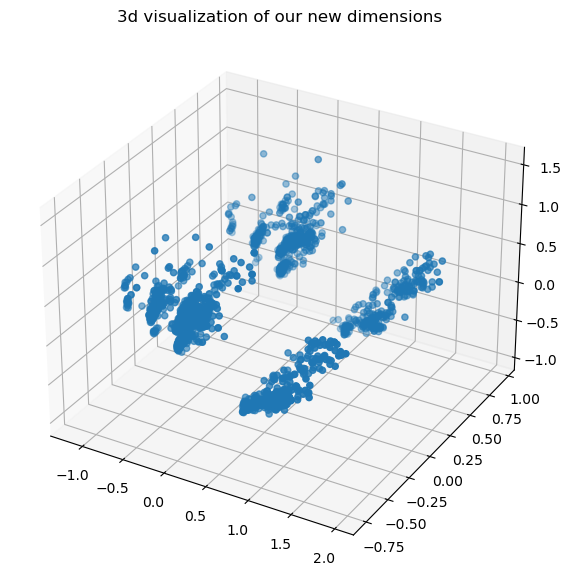

In [30]:
#visualizing our new data dimensions
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,marker="o")
ax.set_title("3d visualization of our new dimensions");

In [ ]:
#eigen values of our pca object




## **K-means clustering**

**K-means clustering** is a method of vector quantization, originally from signal processing, that aims to **partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean** ([Wiki](https://en.wikipedia.org/wiki/K-means_clustering)). This is a method of **unsupervised learning** that learns the commonalities between groups of data without any target or labeled variable.

K-means clustering algorithm spits the records in the data into a **pre-defined number of clusters**, where the data points within each cluster are close to each other. One difficulty of using k-means clustering for customer segmentation is the fact that you need to know the number of clusters beforehand. Luckily, the silhouette coefficient can help you.

**The silhouette coefficient** measures how close the data points are to their clusters compared to other clusters. The silhouette coefficient values range from -1 to 1, where the closer the values are to 1, the better they are.

Let's find the best number of clusters:
### Clustering
- elbow method to determine the number of clusters to be made
- clustering via kmeans clustering
- examine our new cluster by plotting

In [33]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

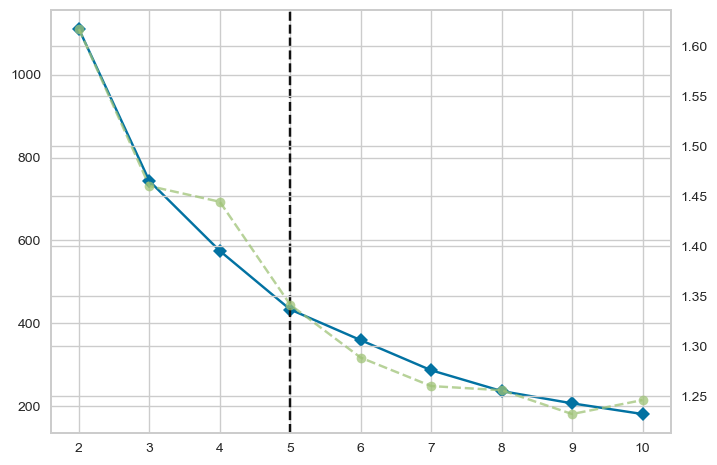

In [34]:
#instantiate k elbow viz
elbow = KElbowVisualizer(KMeans())
elbow.fit(PCA_ds)

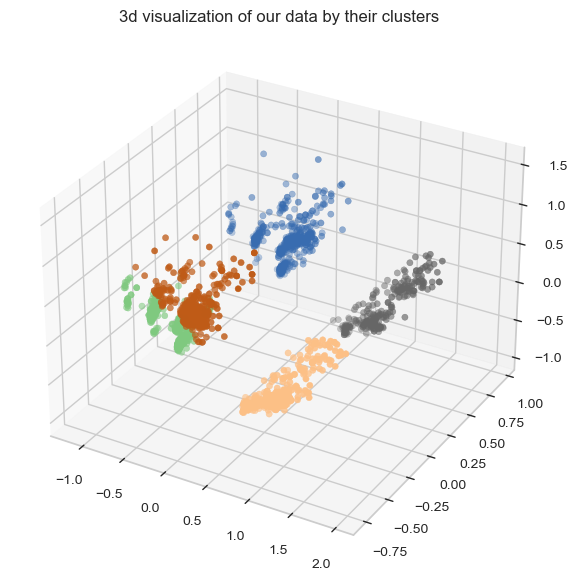

In [35]:
#fitting Kmeans algo to our dataset
kmeans = KMeans(n_clusters=5)
y_means = kmeans.fit_predict(PCA_ds)

#adding the clusters to the dimensions dataframe
PCA_ds["Clusters"] = y_means
data["Clusters"] = y_means

#plotting new data points
cmap = "Accent"
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c=data['Clusters'],marker="o",cmap=cmap)
ax.set_title("3d visualization of our data by their clusters");

In [37]:
#PCA_ds
data.Clusters.value_counts()

Clusters
0    657
2    532
3    391
1    380
4    252
Name: count, dtype: int64

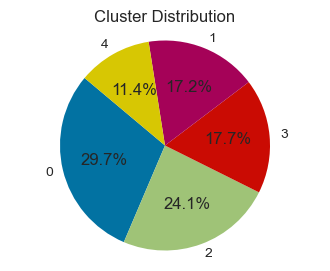

In [95]:
#plotting new data points
#distribution of clusters

# Count the occurrences of each cluster
cluster_counts = data['Clusters'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 3))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Cluster Distribution')
plt.show();

- The highest proportion of customers (29.7%) fall into cluster 0 while the least proportion of customers (11.4%) fall into cluster 4.

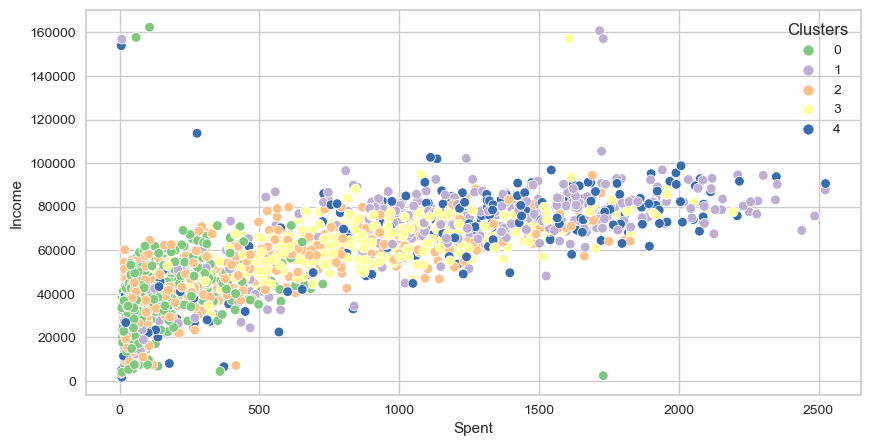

In [50]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Spent",y="Income",hue="Clusters",palette="Accent",data=data);

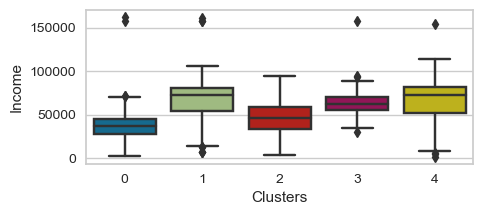

In [51]:
plt.figure(figsize=(5,2))
sns.boxplot(x="Clusters",y="Income",data=data);

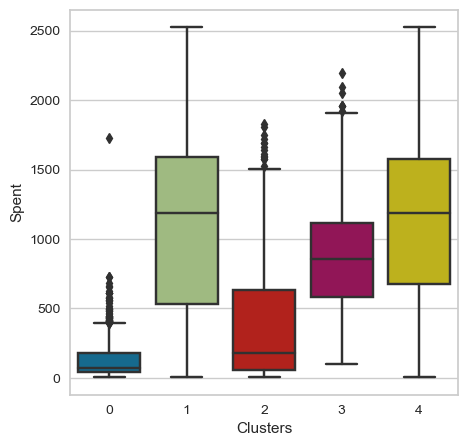

In [54]:
plt.figure(figsize=(5,5))
sns.boxplot(x="Clusters",y="Spent",data=data);

### observations
- cluster1 are high earners and high spenders
- cluster1 and cluster 2 are low income earners and low spenders
- cluster0 are average income and spenders
- cluster 3 are average to high income earners and spenders

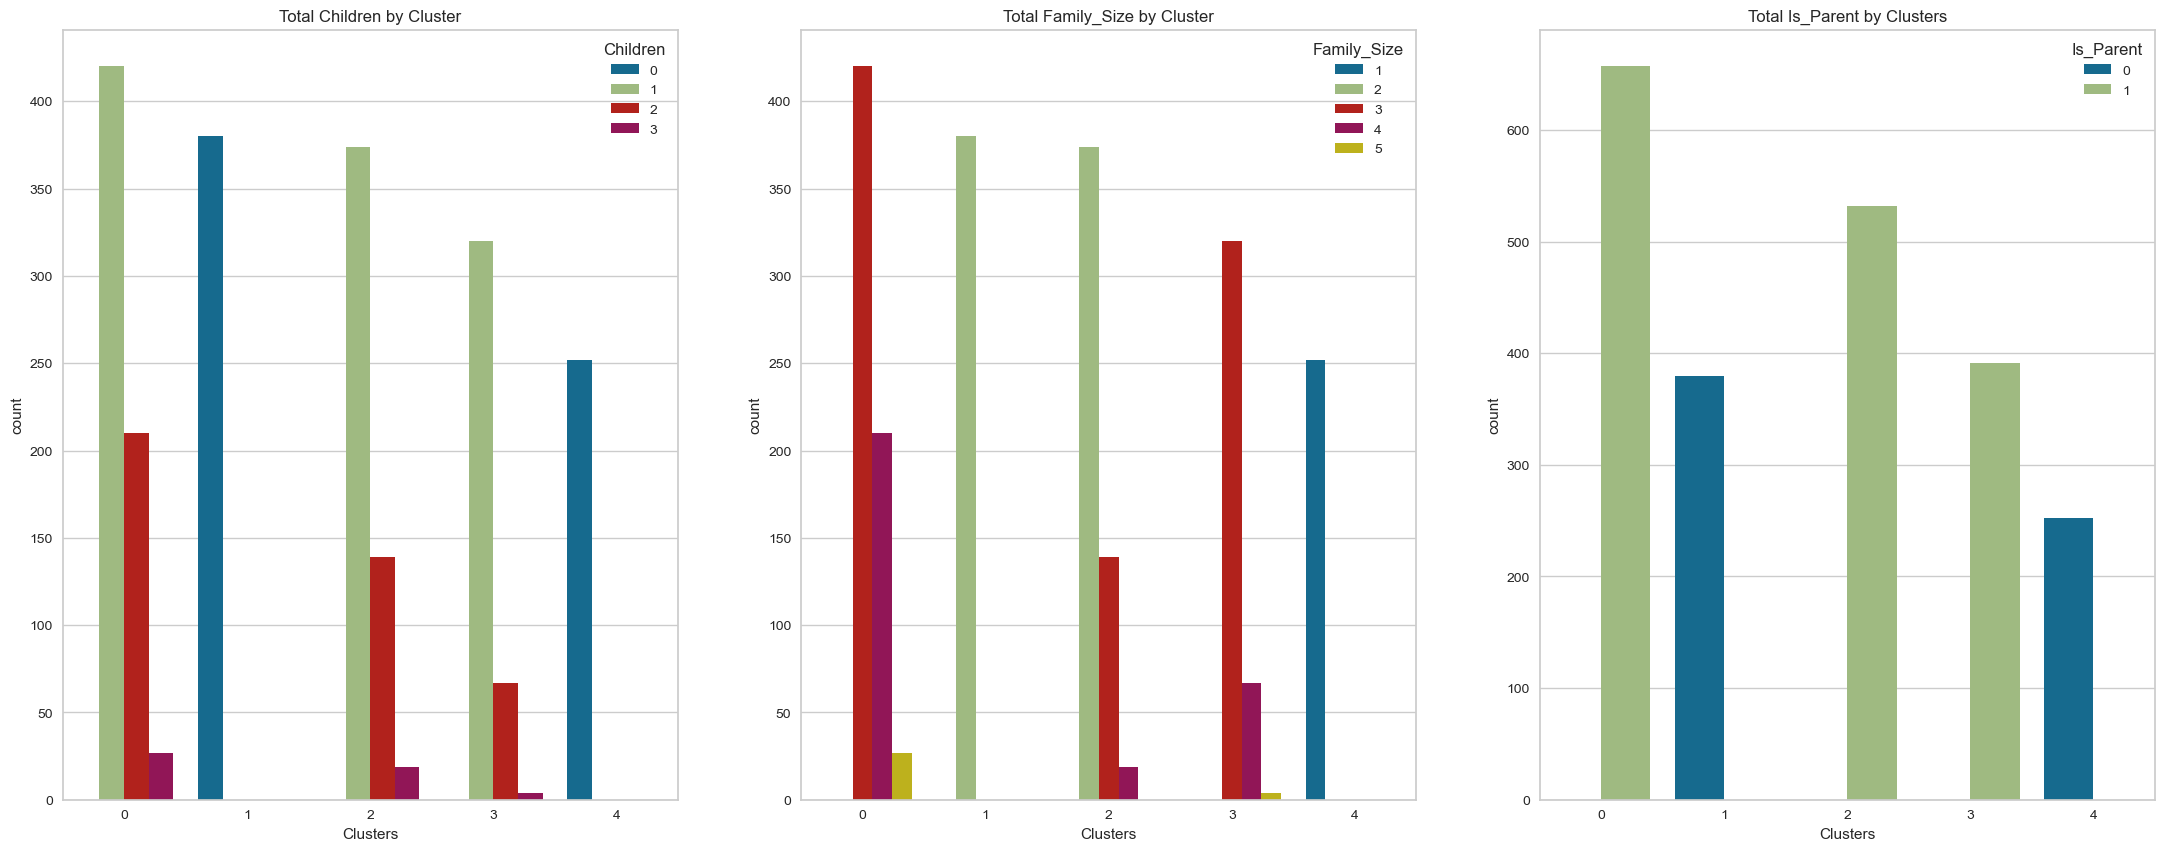

In [98]:
# bivariate analysis for numerical variables
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(27,10))

sns.countplot(x='Clusters', data=data, hue='Children', ax=axs[0])
axs[0].set_title('Total Children by Cluster')

sns.countplot(x='Clusters', data=data, hue='Family_Size', ax=axs[1])
axs[1].set_title('Total Family_Size by Cluster')

sns.countplot(x='Clusters', data=data, hue='Is_Parent', ax=axs[2])
axs[2].set_title('Total Is_Parent by Clusters');

- Cluster 1 & 4: Non-parents with a family size of 2.
- Cluster 2: Mostly Parents with a family size of 2.
- Cluster 0 & 3: Are mostly parents with a family size of 3.

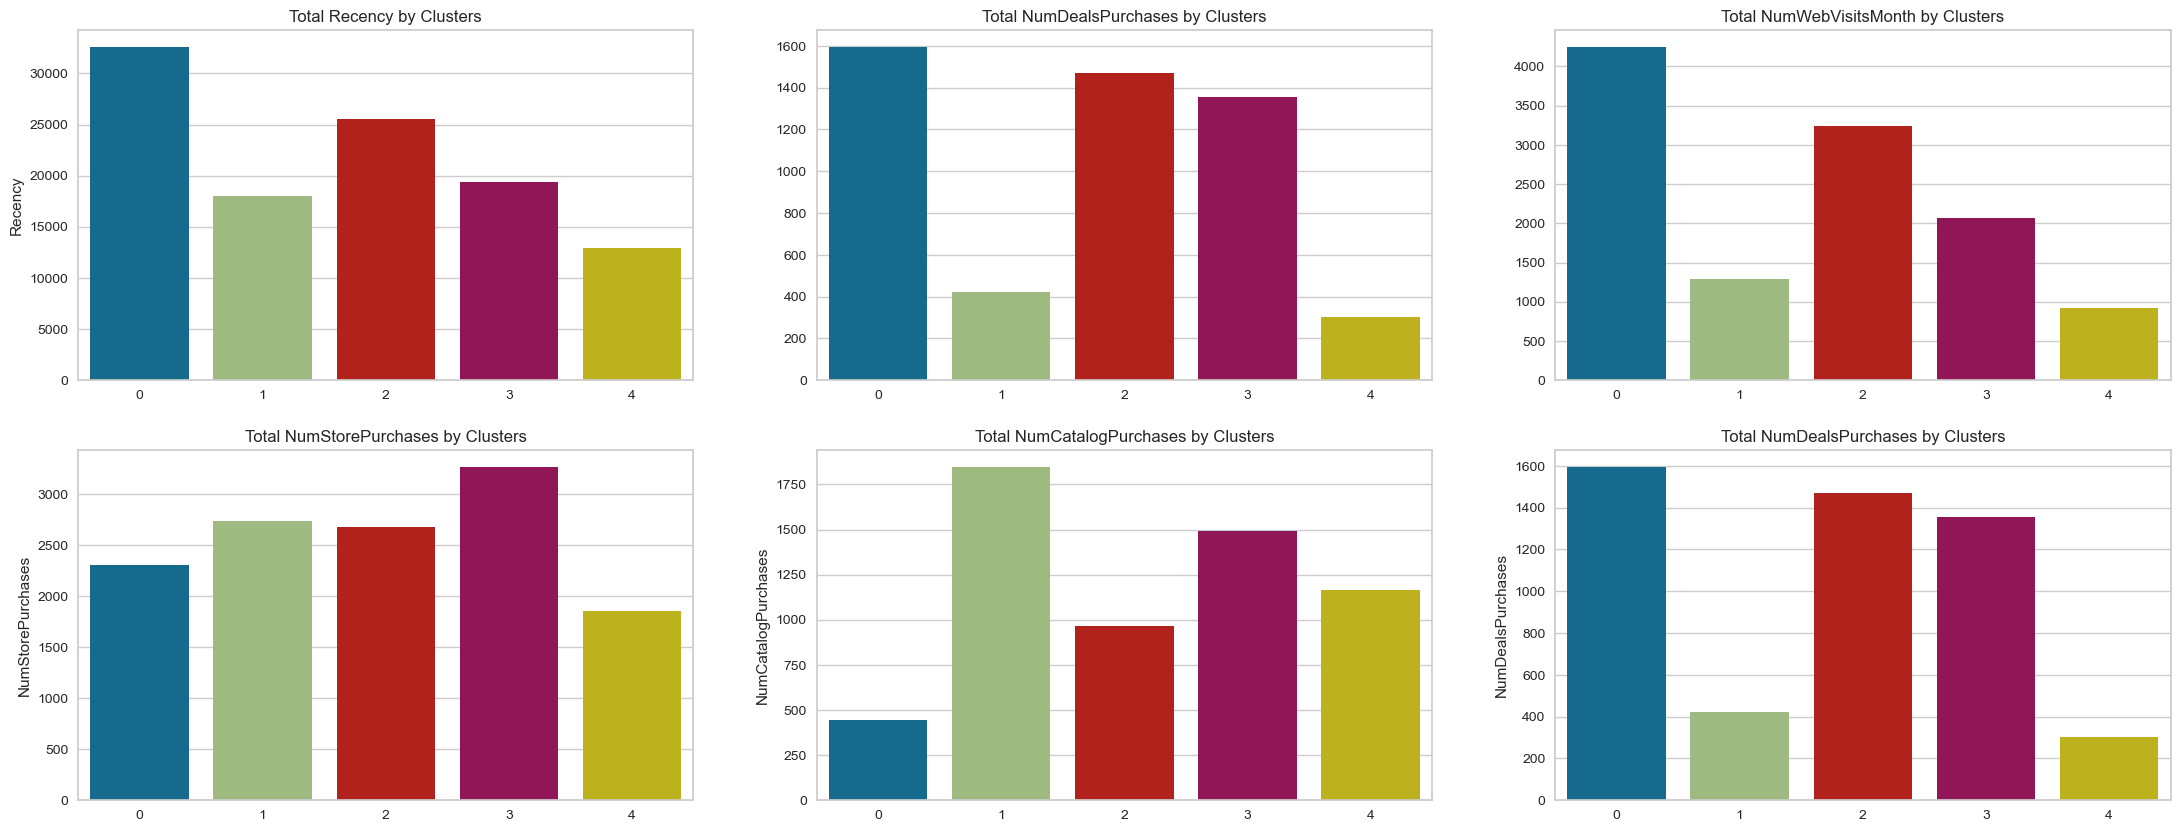

In [68]:
# bivariate analysis for categorical variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

cust_profit = data.groupby('Clusters')['Recency'].sum().reset_index()
sns.barplot(x='Clusters', data=cust_profit, y='Recency', ax=axs[0,0])
axs[0,0].set_title('Total Recency by Clusters')
axs[0,0].set_xlabel('')

pers_profit = data.groupby('Clusters')['NumDealsPurchases'].sum().reset_index()
sns.barplot(x='Clusters', data=pers_profit, y='NumDealsPurchases', ax=axs[0,1])
axs[0,1].set_title('Total NumDealsPurchases by Clusters')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

age_profit = data.groupby('Clusters')['NumWebVisitsMonth'].sum().reset_index()
sns.barplot(x='Clusters', data=age_profit, y='NumWebVisitsMonth', ax=axs[0,2])
axs[0,2].set_title('Total NumWebVisitsMonth by Clusters')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

pdt_profit = data.groupby('Clusters')['NumStorePurchases'].sum().reset_index()
sns.barplot(x='Clusters', data=pdt_profit, y='NumStorePurchases', ax=axs[1,0])
axs[1,0].set_title('Total NumStorePurchases by Clusters')
axs[1,0].set_xlabel('')

sub_profit = data.groupby('Clusters')['NumCatalogPurchases'].sum().reset_index()
sns.barplot(x='Clusters', data=sub_profit, y='NumCatalogPurchases', ax=axs[1,1])
axs[1,1].set_title('Total NumCatalogPurchases by Clusters')
axs[1,1].set_xlabel('')

pay_profit = data.groupby('Clusters')['NumDealsPurchases'].sum().reset_index()
sns.barplot(x='Clusters', data=pay_profit, y='NumDealsPurchases', ax=axs[1,2])
axs[1,2].set_title('Total NumDealsPurchases by Clusters')
axs[1,2].set_xlabel('');

- Cluster 1: They visited the store’s website second least, mostly made purchses from the stores catalogue.
- Cluster 4: Frequent shoppers with the shortest recency. Least likely to make discounted purchases, visit the store's website and make direct purchases from stores. 
- Cluster 0: Least purchases from the stores catalogue. Longest recency, highest discounted purchases, and most website visits rate.
- Cluster 3: They mostly made purchases directly from the stores
- Cluster 2: Second-highest recency, discounted purchases and website visitation rate

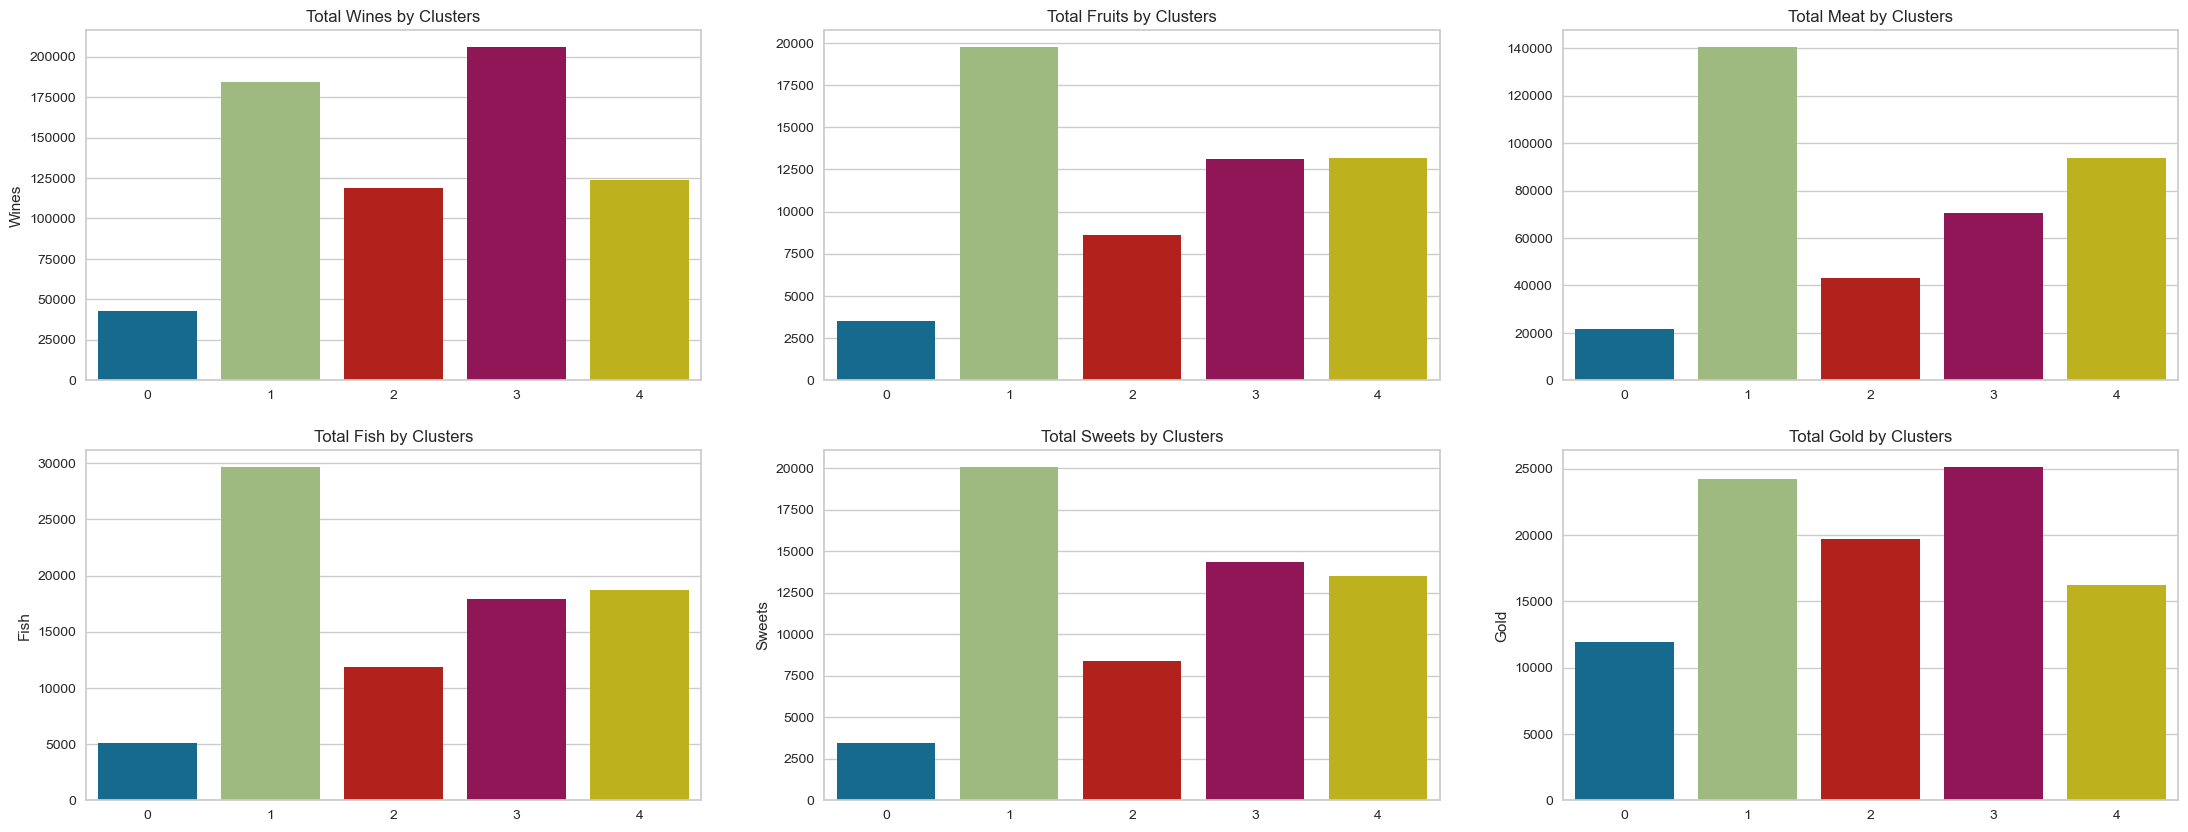

In [67]:
# bivariate analysis for categorical variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

cust_profit = data.groupby('Clusters')['Wines'].sum().reset_index()
sns.barplot(x='Clusters', data=cust_profit, y='Wines', ax=axs[0,0])
axs[0,0].set_title('Total Wines by Clusters')
axs[0,0].set_xlabel('')

pers_profit = data.groupby('Clusters')['Fruits'].sum().reset_index()
sns.barplot(x='Clusters', data=pers_profit, y='Fruits', ax=axs[0,1])
axs[0,1].set_title('Total Fruits by Clusters')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

age_profit = data.groupby('Clusters')['Meat'].sum().reset_index()
sns.barplot(x='Clusters', data=age_profit, y='Meat', ax=axs[0,2])
axs[0,2].set_title('Total Meat by Clusters')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

pdt_profit = data.groupby('Clusters')['Fish'].sum().reset_index()
sns.barplot(x='Clusters', data=pdt_profit, y='Fish', ax=axs[1,0])
axs[1,0].set_title('Total Fish by Clusters')
axs[1,0].set_xlabel('')

sub_profit = data.groupby('Clusters')['Sweets'].sum().reset_index()
sns.barplot(x='Clusters', data=sub_profit, y='Sweets', ax=axs[1,1])
axs[1,1].set_title('Total Sweets by Clusters')
axs[1,1].set_xlabel('')

pay_profit = data.groupby('Clusters')['Gold'].sum().reset_index()
sns.barplot(x='Clusters', data=pay_profit, y='Gold', ax=axs[1,2])
axs[1,2].set_title('Total Gold by Clusters')
axs[1,2].set_xlabel('');

- Cluster 1: They are high spenders across all product categories
- Cluster 4: They are moderate spenders across all product categories
- Cluster 2 and 3: They mostly purchased gold and wine
- Cluster 0: They are the lowest spenders, but across product categories but they purchased gold more.

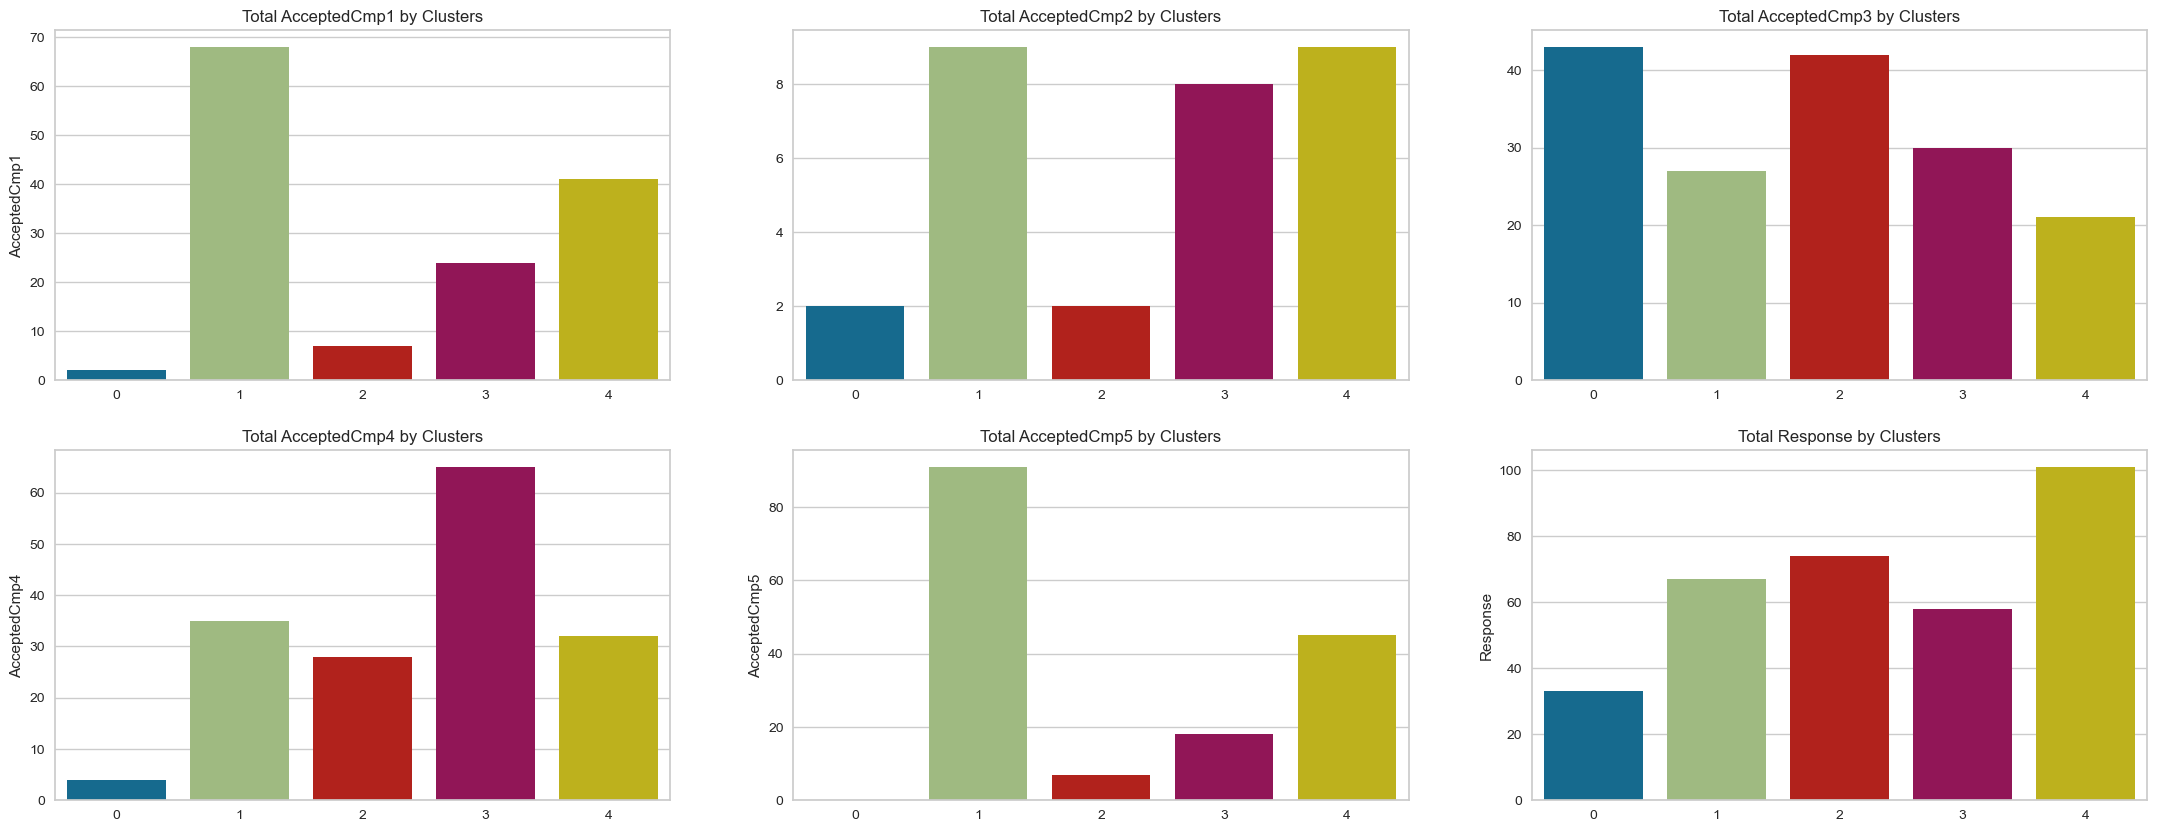

In [69]:
# bivariate analysis for categorical variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

cust_profit = data.groupby('Clusters')['AcceptedCmp1'].sum().reset_index()
sns.barplot(x='Clusters', data=cust_profit, y='AcceptedCmp1', ax=axs[0,0])
axs[0,0].set_title('Total AcceptedCmp1 by Clusters')
axs[0,0].set_xlabel('')

pers_profit = data.groupby('Clusters')['AcceptedCmp2'].sum().reset_index()
sns.barplot(x='Clusters', data=pers_profit, y='AcceptedCmp2', ax=axs[0,1])
axs[0,1].set_title('Total AcceptedCmp2 by Clusters')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

age_profit = data.groupby('Clusters')['AcceptedCmp3'].sum().reset_index()
sns.barplot(x='Clusters', data=age_profit, y='AcceptedCmp3', ax=axs[0,2])
axs[0,2].set_title('Total AcceptedCmp3 by Clusters')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

pdt_profit = data.groupby('Clusters')['AcceptedCmp4'].sum().reset_index()
sns.barplot(x='Clusters', data=pdt_profit, y='AcceptedCmp4', ax=axs[1,0])
axs[1,0].set_title('Total AcceptedCmp4 by Clusters')
axs[1,0].set_xlabel('')

sub_profit = data.groupby('Clusters')['AcceptedCmp5'].sum().reset_index()
sns.barplot(x='Clusters', data=sub_profit, y='AcceptedCmp5', ax=axs[1,1])
axs[1,1].set_title('Total AcceptedCmp5 by Clusters')
axs[1,1].set_xlabel('')

pay_profit = data.groupby('Clusters')['Response'].sum().reset_index()
sns.barplot(x='Clusters', data=pay_profit, y='Response', ax=axs[1,2])
axs[1,2].set_title('Total Response by Clusters')
axs[1,2].set_xlabel('');

- CLusters 1: They mostly accepted offers in the 1st , 2nd, 3rd campaigns
- CLusters 2: They mostly accepted offers in the 3rd and last campaigns
- CLusters 0: They mostly accepted offers in the last campaigns
- CLusters 3: They mostly accepted offers in the 4th and 2nd campaigns
- CLusters 4: They mostly accepted offers in the 2nd, and last campaigns

In [84]:
# group customer age
def age_group(x):
    if x <= 25:
        return '<= 25 Young Adult'
    elif x <= 40:
        return '26 - 40 Adult'
    elif x <= 50:
        return '<= 41 - 50 Old Adult'
    else:
        return '>= 51 Elder'
    
# apply function to the the data
data['Age_gp'] = data['Age'].apply(age_group)

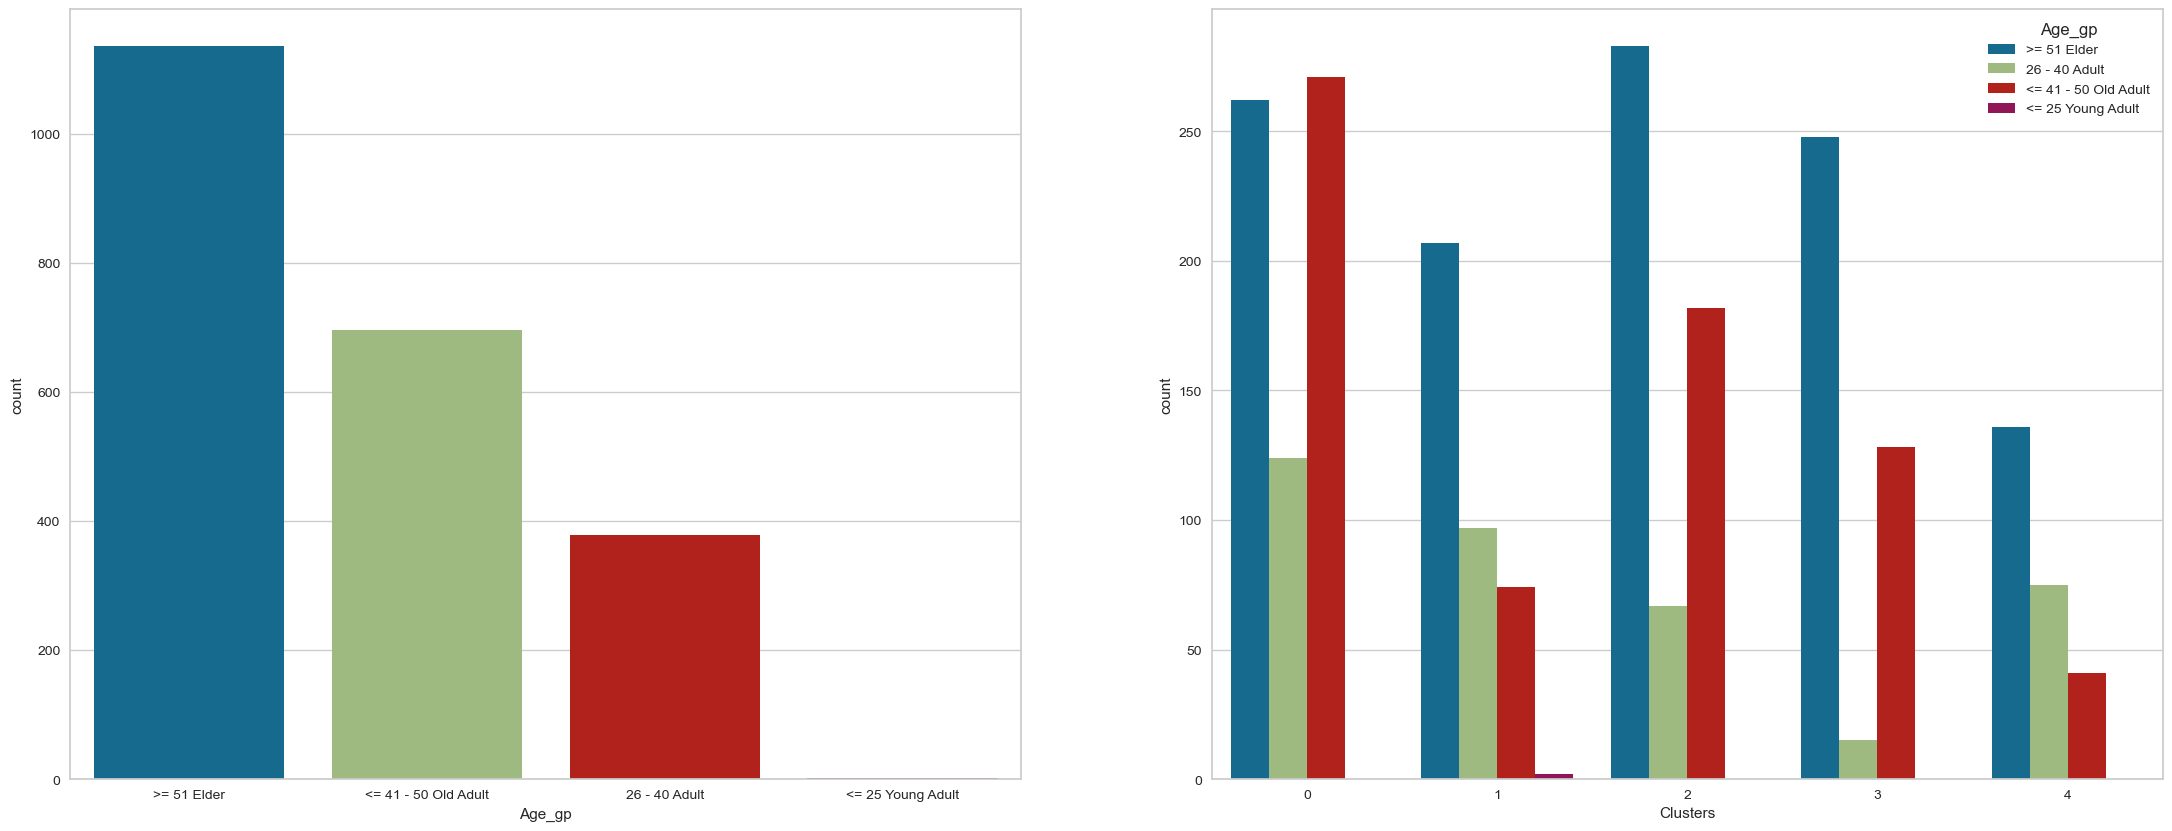

In [101]:
#total transactions by customer age group
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(27,10))
sns.countplot(x=data['Age_gp'], order=data['Age_gp'].value_counts(ascending=False).index, ax=axs[0]);
sns.countplot(x=data['Clusters'], hue=data['Age_gp'], ax=axs[1]);

- The elders (>= 51) are the highest customers while youth (<21) are the lowest customers.
- Customers are mostly elders (>= 51) and adults (26-40) in clusters 1, 4
- Customers are mostly elders (>= 51) and old adult (41-50) in clusters 2, 3
- Customers are mostly old adult (41-50) and elders (>= 51) in cluster 0

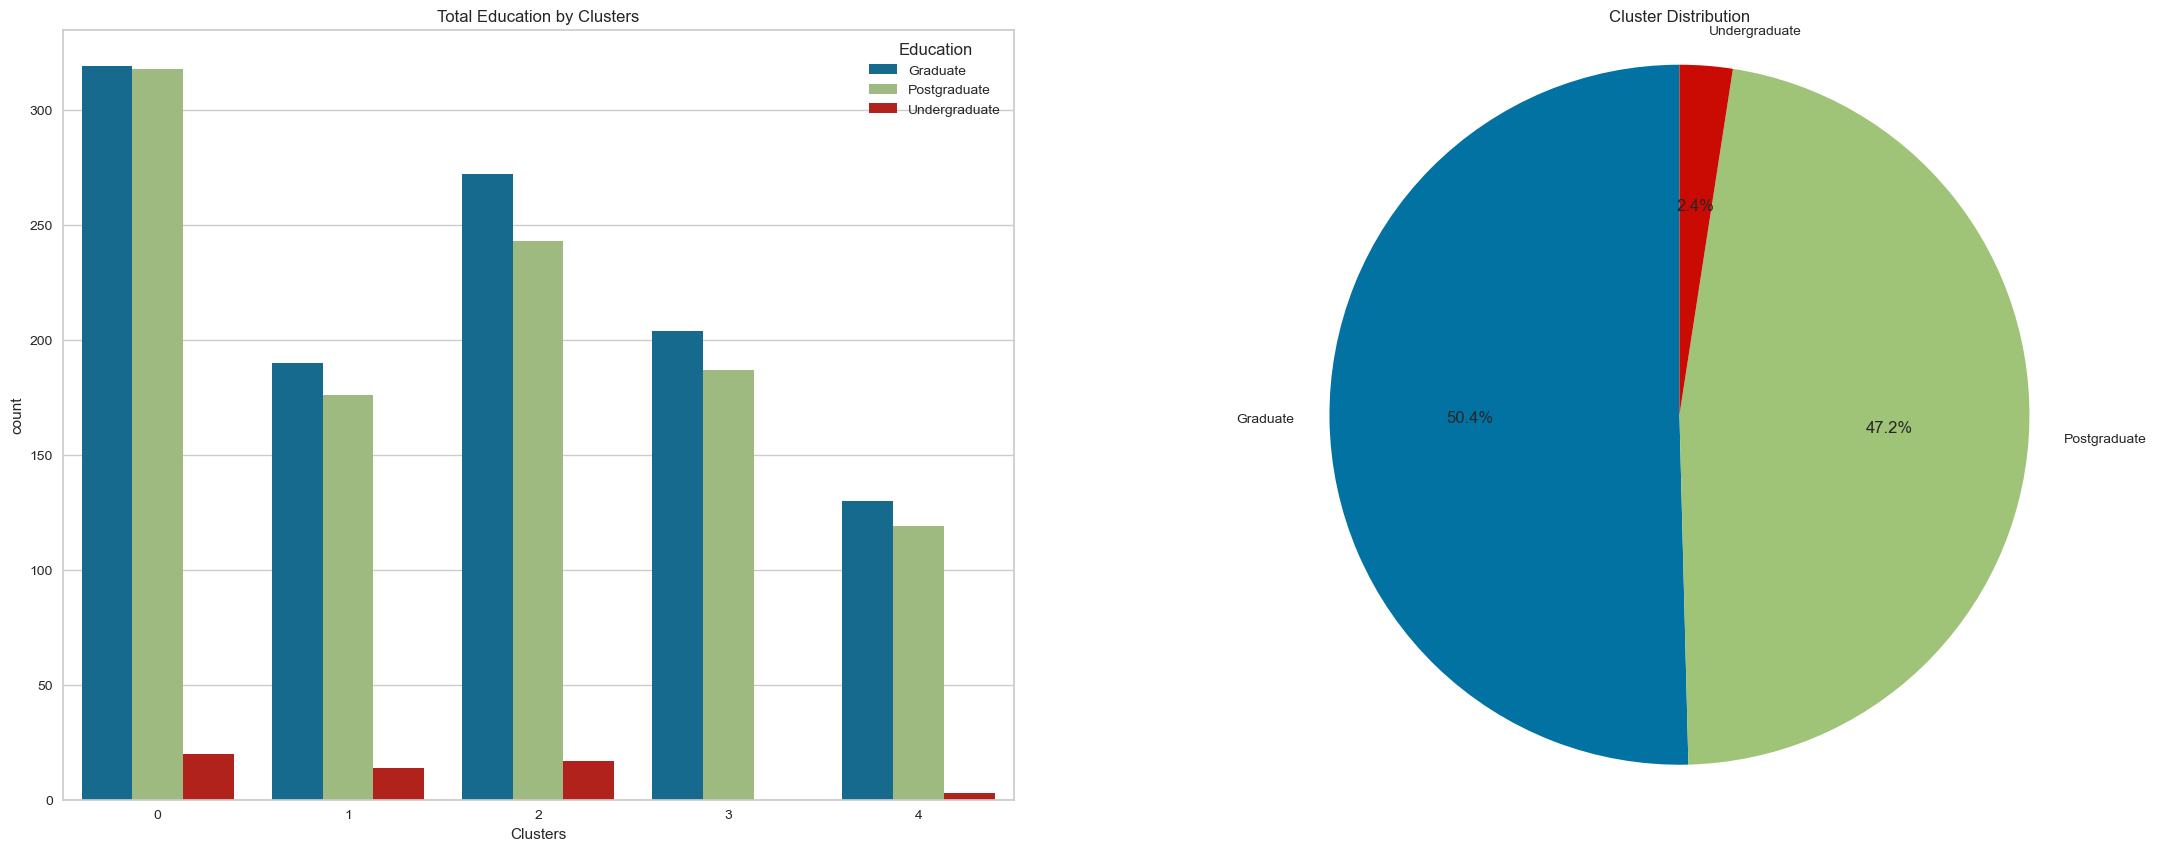

In [106]:
#total transactions by education type
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(27,10))

# Plot countplot for education distribution within clusters
sns.countplot(x='Clusters', data=data, hue='Education', ax=axs[0])
axs[0].set_title('Total Education by Clusters')

# Plot pie chart for cluster distribution
cluster_counts = data['Education'].value_counts()
axs[1].pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Cluster Distribution')

plt.show();

- 50.4% of customers are graduates, 47.2% are postgraduates while 2.4% are undergraduates. 
- This pattern is also seen across all clusters.